**Importing required libraries**

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, probplot

**Importing dataset**

In [119]:
dataset = pd.read_csv(r"forestfires.csv")
df = dataset.copy()
df.shape

(517, 13)

**Inserting Feature Names**

In [120]:
df.columns=['X', 'Y', 'Month', 'Day', 'FFMC', 'DMC', 'DC', 'ISI', 'Temp', 'RH', 'Wind', 'Rain', 'Area']
df

,X,Y,Month,Day,FFMC,DMC,DC,ISI,Temp,RH,Wind,Rain,Area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


**PREPROCESSING**

**1) Checking for Null values in each row**

In [121]:
rows=df.shape[0]

print('No.of null values of each feature is as follows.')
for feature in df:
    print(feature,(5-len(feature))*' ',rows-df[feature].isnull().count())

No.of null values of each feature is as follows.
X      0
Y      0
Month  0
Day    0
FFMC   0
DMC    0
DC     0
ISI    0
Temp   0
RH     0
Wind   0
Rain   0
Area   0


**2) Converting features of str type to int (day and month)**

In [122]:
#Let 1 be winter, 2 be summer, 3 be monsoon
month_dict={'jan': 1, 'feb': 1, 'mar': 2, 'apr': 2, 'may': 2, 'jun': 2, 'jul': 3, 'aug': 3, 'sep': 3, 'oct': 3, 'nov': 1, 'dec': 1}
day_dict={'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}

df['Month']=df['Month'].replace(month_dict)
#Renaming the Month column as Season
df = df.rename(columns={'Month': 'Season'})

df['Day']=df['Day'].replace(day_dict)
df

,X,Y,Season,Day,FFMC,DMC,DC,ISI,Temp,RH,Wind,Rain,Area
0,7,5,2,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,3,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,3,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,2,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,2,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,3,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,3,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,3,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,3,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


**Checking box plots for each variable in each season**

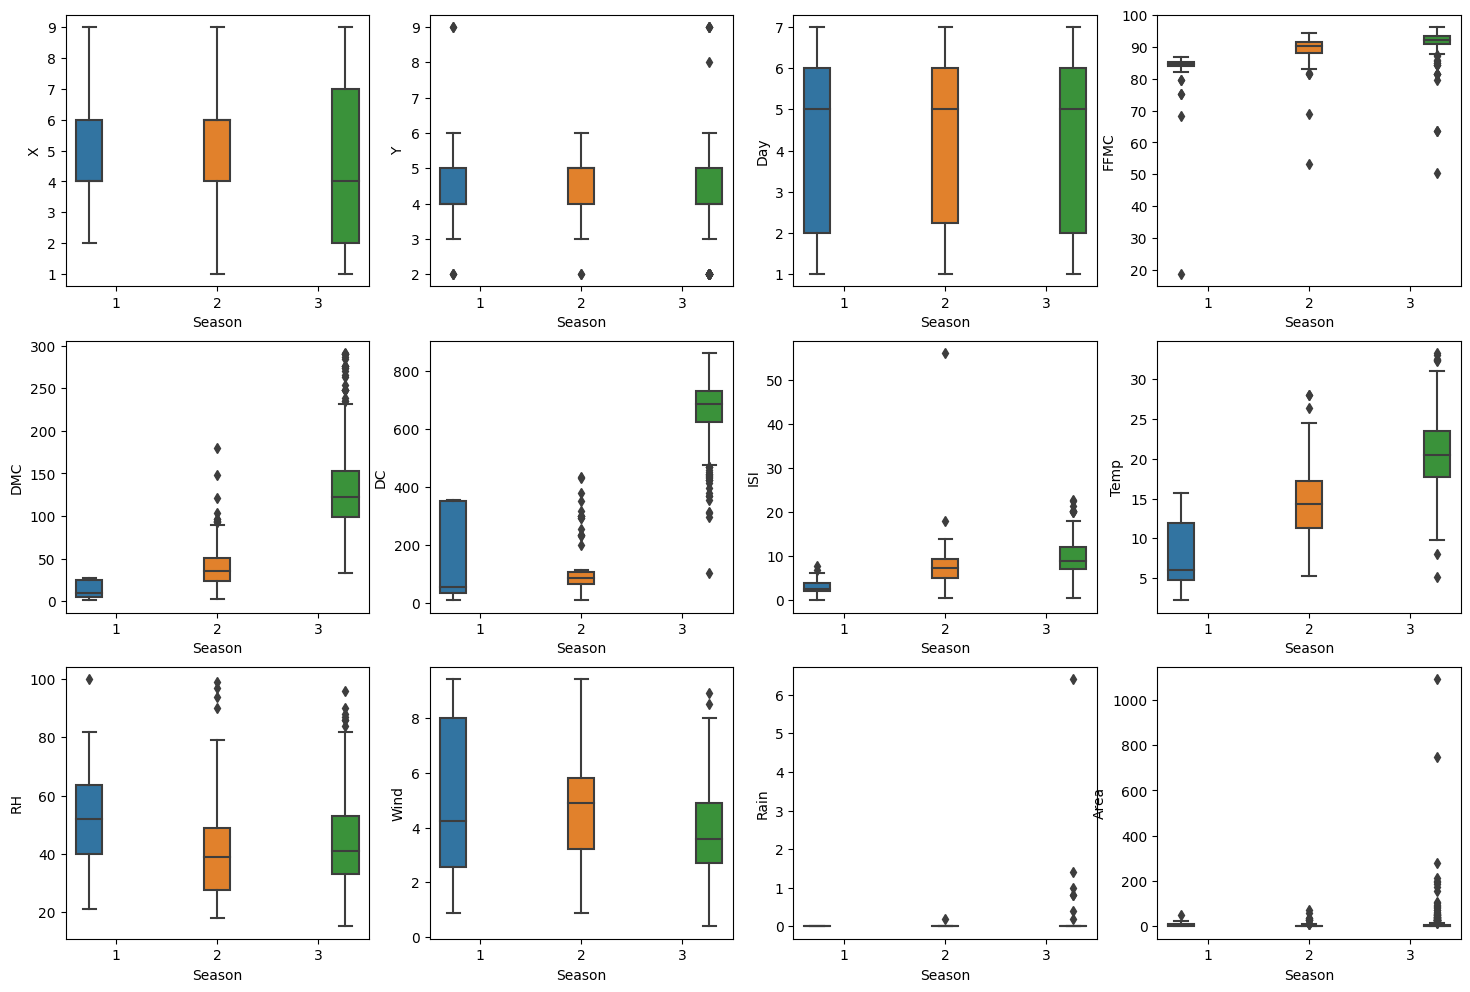

In [123]:
i=1
plt.figure(figsize=(18,12))
for feature in df:
    if feature!='Season':
        plt.subplot(3,4,i)
        y=sns.boxplot(x=df['Season'],y=df[feature], hue=df['Season'])
        y.legend_.remove()
        #plt.tick_params(axis='x', labelsize=5)
        i+=1
plt.savefig('boxplots.jpg')

**Checking histograms for each variable in each season**

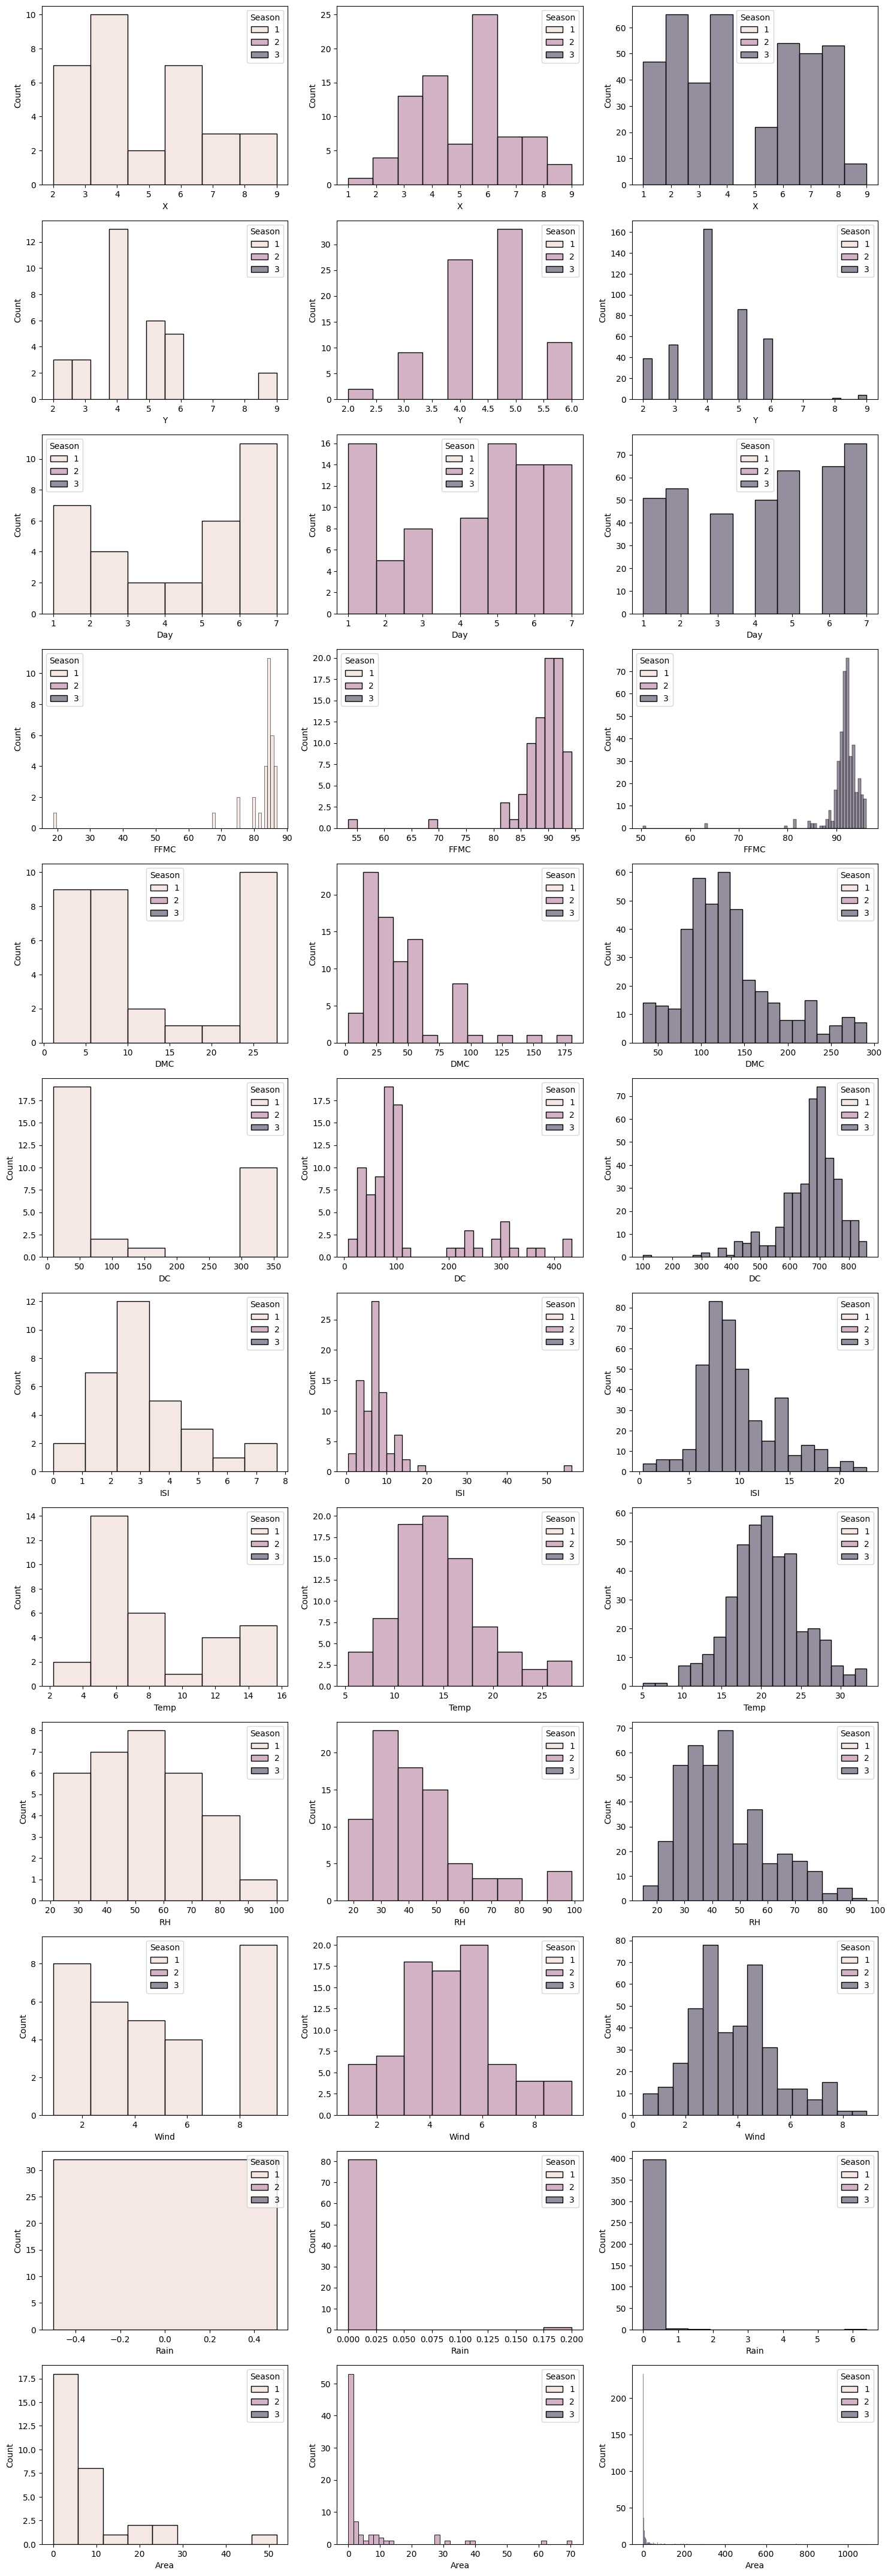

In [124]:
i=1
plt.figure(figsize=(18,55))
for feature in df:
    if feature!='Season':
        for y in range(1,4):
            plt.subplot(12,3,i)
            sns.histplot(x=df[df['Season']==y][feature],hue=df['Season'])
            i+=1
plt.savefig('histplots.jpg')

**Finding features with high correlation from a heatmap**

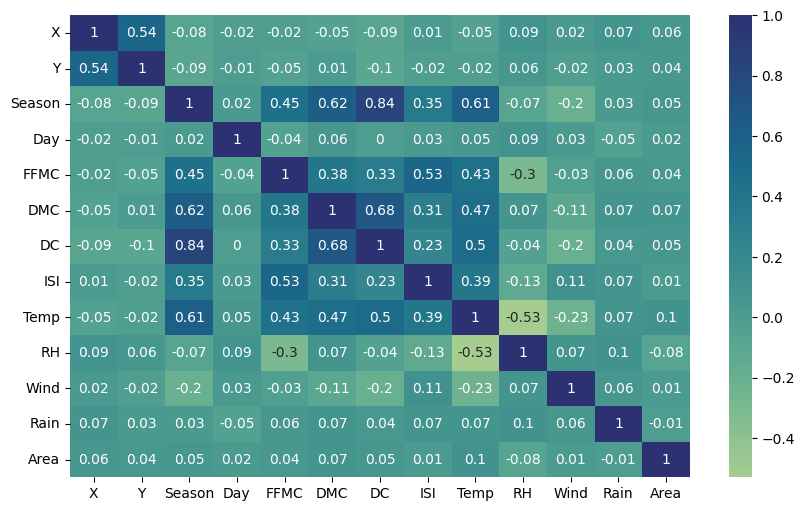

In [125]:
plt.figure(figsize=(10,6))
sns.heatmap(np.round(df.corr(),2), annot=True, cmap="crest")
plt.show()

**Plotting histogram, boxplot and probability plot for each feature**

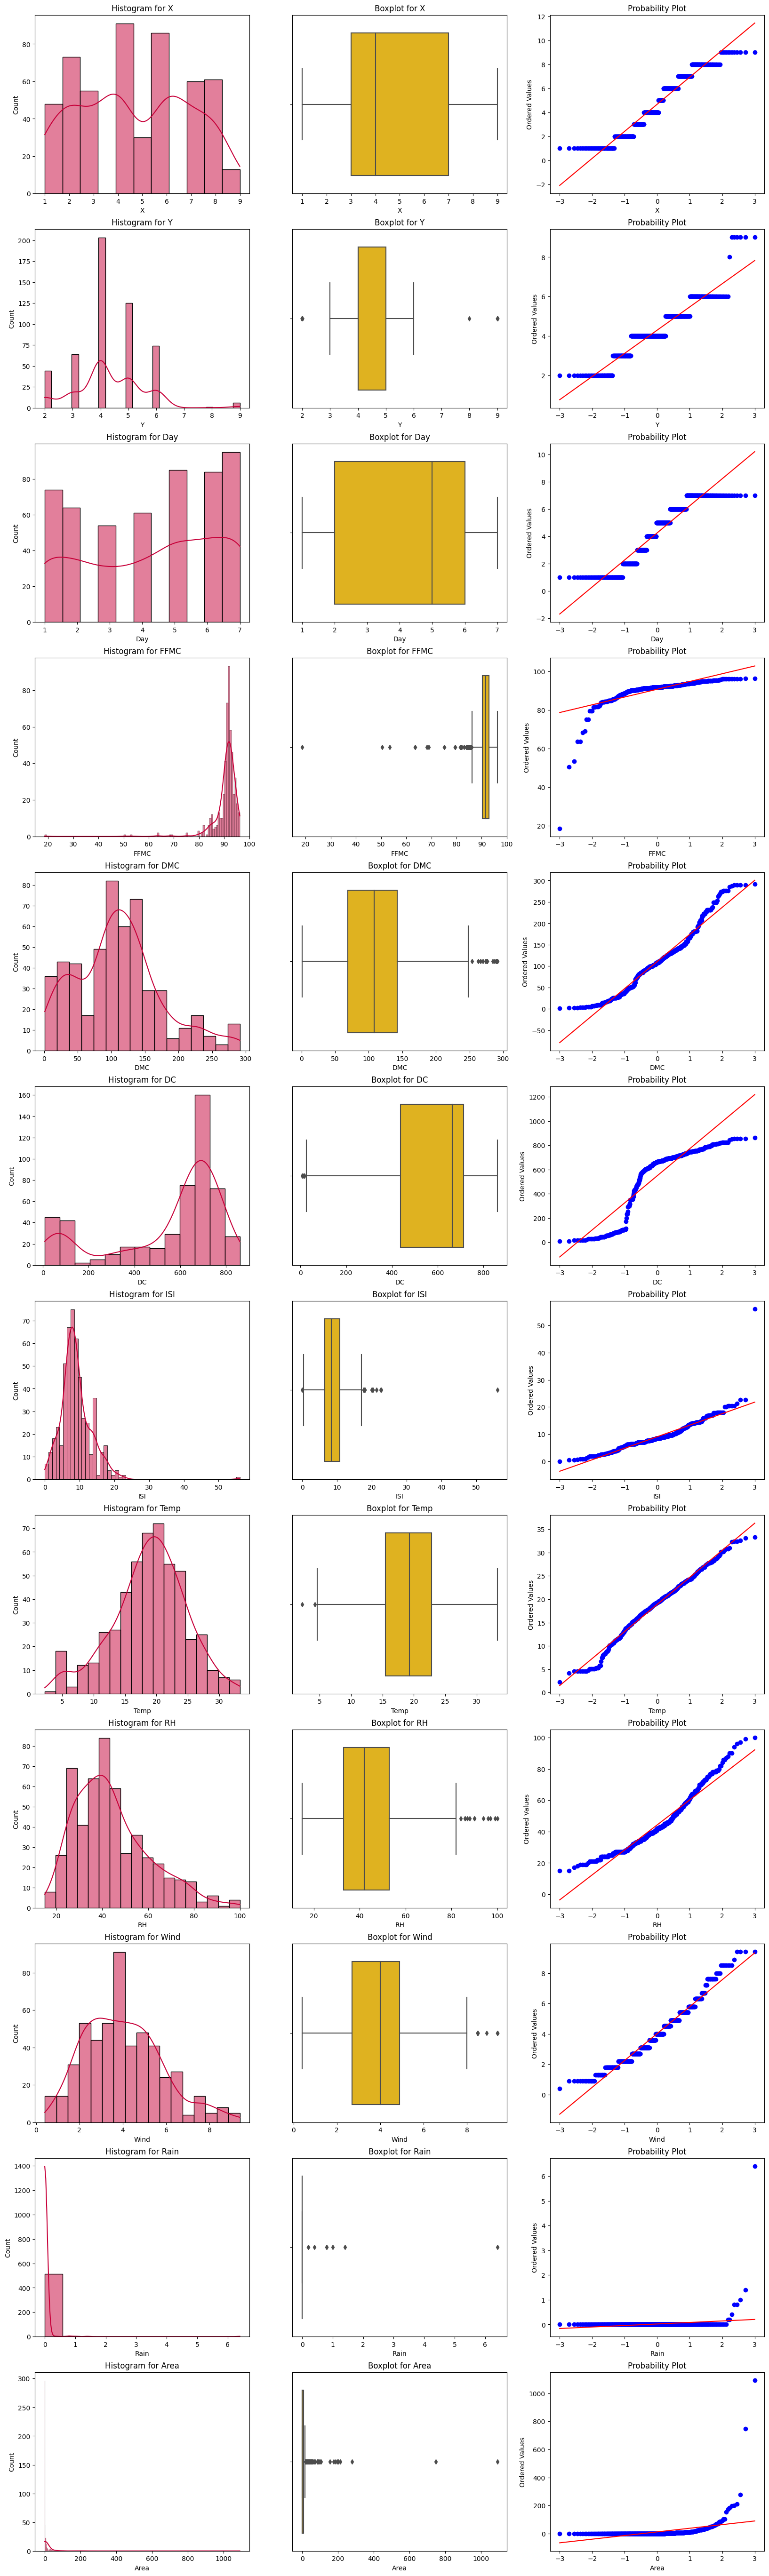

In [126]:
i=1
plt.figure(figsize=(20,70))
for feature in df:
    if feature!='Season':

        #Histogram
        plt.subplot(12,3,i)
        
        plt.title('Histogram for {}'.format(feature))
        ax=sns.histplot(x=df[feature], kde=True, color = '#C70039')

        i+=1

        #Boxplot
        plt.subplot(12,3,i)

        plt.title('Boxplot for {}'.format(feature))
        ax=sns.boxplot(x=df[feature], color = '#FFC300')

        i+=1

        #Probability Plot
        plt.subplot(12,3,i)

        plt.title('ProbPlot for {}'.format(feature))
        probplot(x=df[feature], plot=plt)
        plt.xlabel(feature)

        i+=1

plt.savefig('beforeboxcox.jpg')

**Checking the skewness of each feature so that we can normalise them**

In [127]:
df.skew()

X          0.036246
Y          0.417296
Season    -1.907250
Day       -0.212969
FFMC      -6.575606
DMC        0.547498
DC        -1.100445
ISI        2.536325
Temp      -0.331172
RH         0.862904
Wind       0.571001
Rain      19.816344
Area      12.846934
dtype: float64

**Checking if some feature has zero elements in it as the features can't be normalised**

In [128]:
arr=[]
for x in df:
    for y in df[x]:
        if y<=0:
            arr.append(x)
            break
print(arr)

['ISI', 'Rain', 'Area']


**Applying boxcox to normalise data and then plot same graphs**

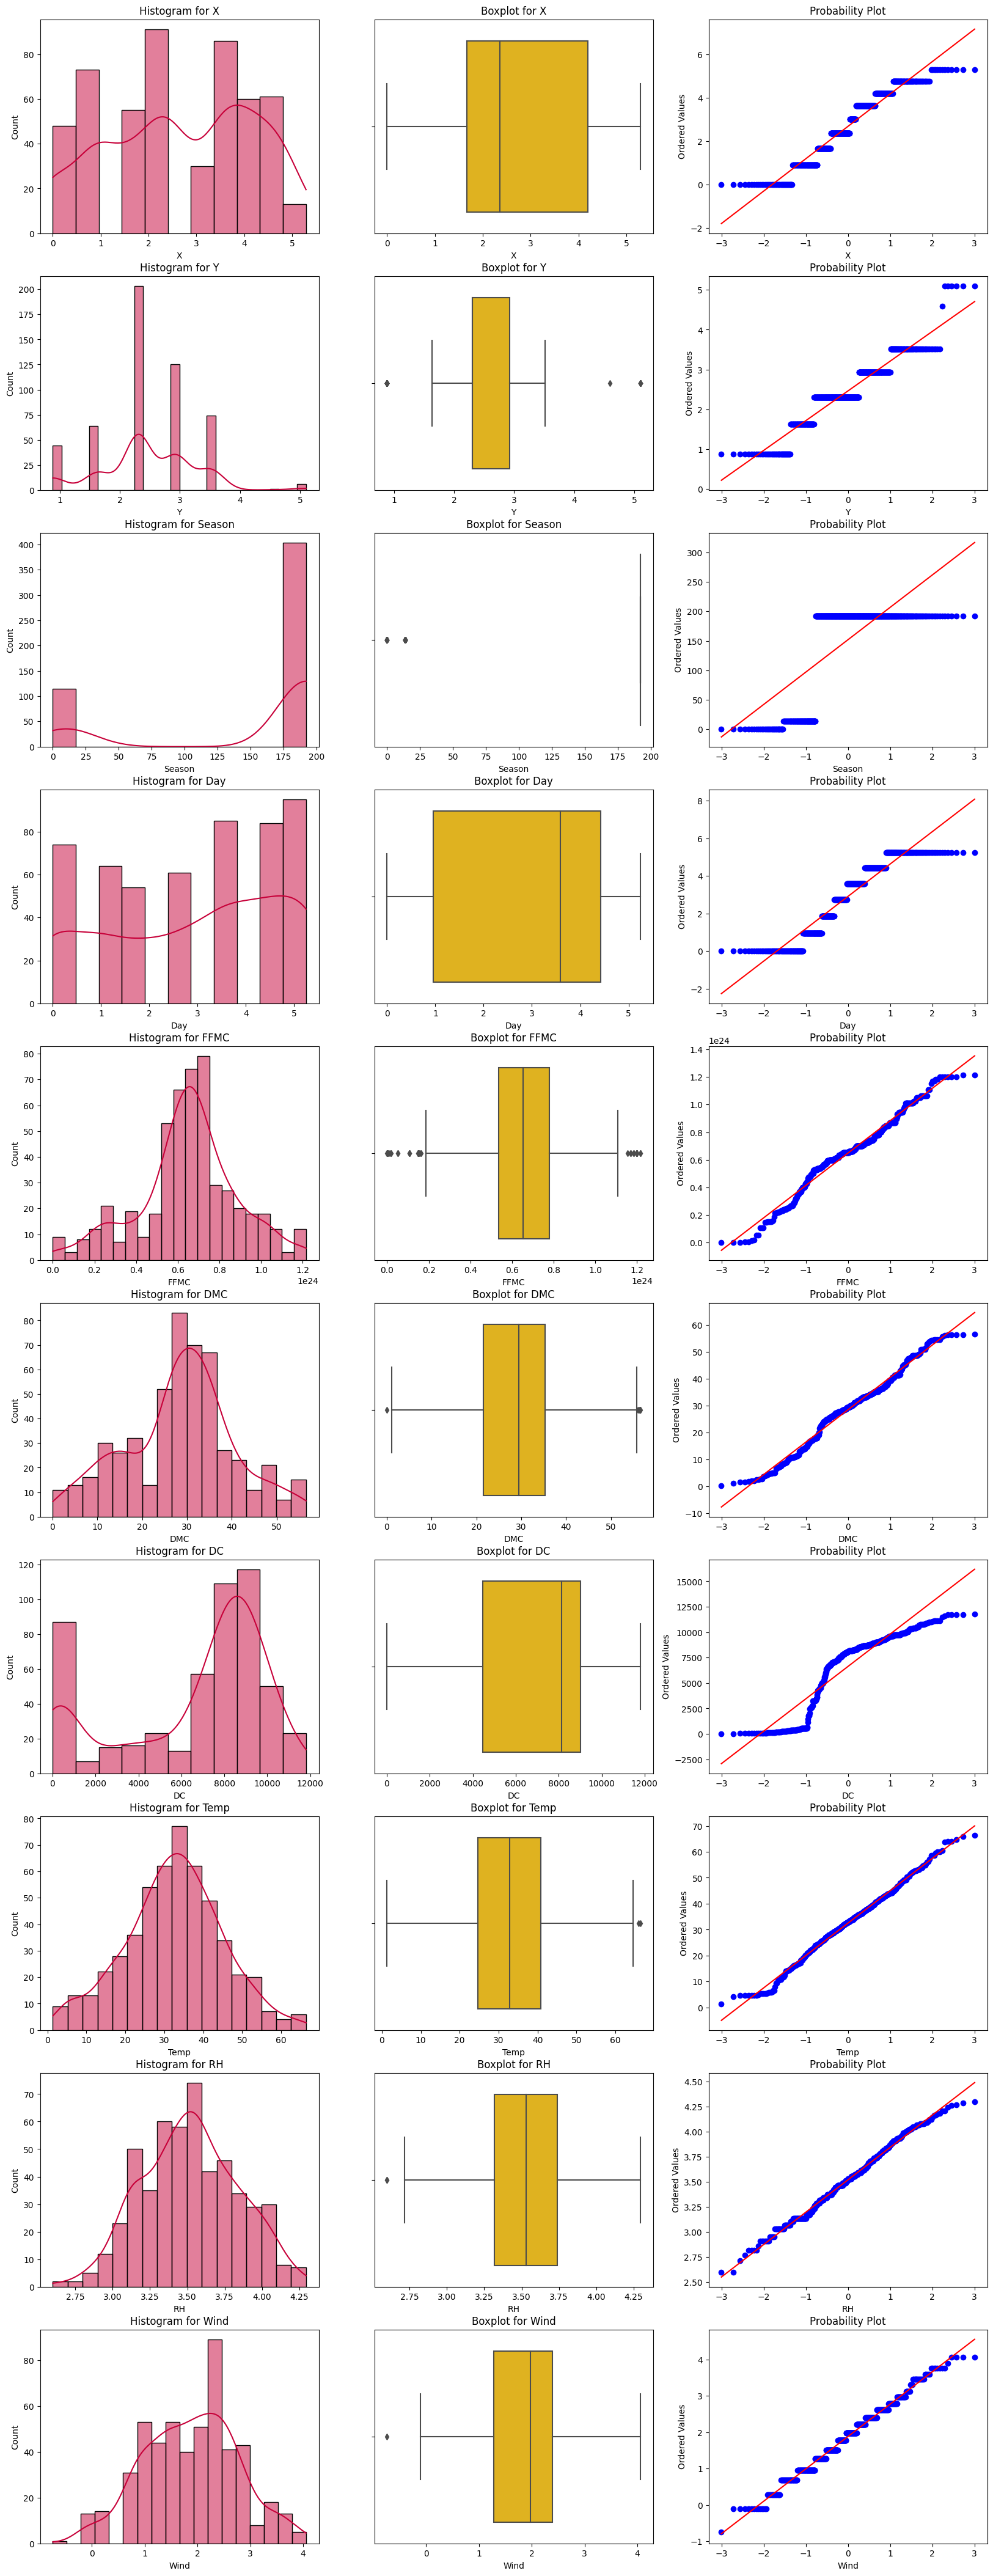

In [129]:
new_skew={}
plt.figure(figsize=(20,70))
i=1

#Features that can't be normalised as some/most of their values are zero
elements = ['Area', 'ISI', 'Rain']

for feature in df:
    if feature not in elements:

        #Boxcox function to normalise the data
        z=boxcox(df[feature])
        lamb=z[1]
        y=(df[feature]**lamb -1)/lamb
        
        new_skew[feature]=y.skew()
        df[feature]=y

        #Histogram
        plt.subplot(13,3,i)
        
        plt.title('Histogram for {}'.format(feature))
        ax=sns.histplot(x=y, kde=True, color = '#C70039')

        i+=1

        #Boxplot
        plt.subplot(13,3,i)

        plt.title('Boxplot for {}'.format(feature))
        ax=sns.boxplot(x=y, color = '#FFC300')

        i+=1

        #Probability Plot
        plt.subplot(13,3,i)

        plt.title('ProbPlot for {}'.format(feature))
        probplot(x=y, plot=plt)
        plt.xlabel(feature)

        i+=1

plt.savefig('afterboxcox.jpg')

**Skewness before boxcox**

In [130]:
print('Skew of each feature before boxcox: ')

df.skew()

Skew of each feature before boxcox: 


X         -0.177132
Y          0.031907
Season    -1.357652
Day       -0.276411
FFMC      -0.258906
DMC       -0.105103
DC        -0.864035
ISI        2.536325
Temp      -0.052987
RH         0.001498
Wind      -0.025643
Rain      19.816344
Area      12.846934
dtype: float64

**Skewness after boxcox**

In [131]:
print('Skew of each feature after boxcox: \n')

for x in new_skew:
    y=(9-len(x))*' '
    z=(8-len(x))*' '
    if new_skew[x]<0:
        print(x,z,new_skew[x].round(6))
    else:
        print(x,y,new_skew[x].round(6))

Skew of each feature after boxcox: 

X         -0.177132
Y          0.031907
Season    -1.357652
Day       -0.276411
FFMC      -0.258906
DMC       -0.105103
DC        -0.864035
Temp      -0.052987
RH         0.001498
Wind      -0.025643


In [132]:
df['Temp'].mean()

32.51318883166447

**Defining a function for two sided hypothesis testing (for μ)**

In [133]:
from scipy.stats import t,norm
# For H0: μ = μ0
def hypo(xbar,s,n,alpha,μ0,var='unknown'):
    #xbar = Sample mean
    #s = Sample stdev
    #n = No. of samples
    #alpha = Level of significance

    if var!='unknown' or n>=30:
        #Applying z-test
        zcal=((n**(1/2))*(xbar-μ0))/s
        zcal=abs(zcal)

        p_value=2 * ( 1 - norm.cdf(zcal) )

        print(' |zcal| =',zcal)
        print('p-value =',p_value)
        print('  alpha =',alpha)
    
    else:
        #Applying t-test
        tcal=(n**(1/2))*(xbar-μ0)/s
        tcal=abs(tcal)

        p_value=2*(1 - t.cdf(tcal,n-1))

        print(' |tcal| =',tcal)
        print('p-value =',p_value)
        print('  alpha =',alpha)
    

    if p_value<=alpha:
        return 'Reject H0'
    else:
        return 'Do not Reject H0'

**i) Defining a hypothesis for the 'Temp' feature:**
$$$$
                                            H0: μ=26     (vs)     H1: μ!=26

**ii) Sampling 35 random values from the 'Temp' feature**

In [134]:
temp_values=df['Temp'].values
x=np.random.choice(temp_values,35,replace=True)
np.random.seed(0)
print(x)

[44.98003291 36.88641312 40.77604977  4.6720943  25.31872202 22.21690959
 35.30868477 33.74540034 43.80371038 39.85361283 22.01311043 24.90040071
 24.69177726 41.9352027  14.76158667 33.96782843 32.63781812 44.03845626
 39.62368946 44.03845626 39.16467202 39.85361283 45.45236628 30.445914
 24.69177726 27.4313941  58.57354922 25.52841654 25.52841654 35.30868477
 33.0799348   4.97487923 13.45902959 41.9352027  27.00609301]


**iii) Passing the parameters to the function to do Hypothesis testing**

In [135]:
n=35
xbar=x.mean()
myu=26
s=x.std()
print(hypo(xbar,s,n,0.05,myu))

 |zcal| = 3.10329434189909
p-value = 0.0019137919607850051
  alpha = 0.05
Reject H0
